## Train GAN ด้วย FastAI

Reference: https://docs.fast.ai/vision.gan.html

In [25]:
from fastbook import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callback.all import *

In [26]:
bs, size = 128, 64
dblock = DataBlock(
    blocks = (TransformBlock, ImageBlock),
    get_x = generate_noise,
    get_items = get_image_files,
    splitter = IndexSplitter([]),
    item_tfms=Resize(size, method=ResizeMethod.Crop), 
    batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))
)

In [27]:
dls = dblock.dataloaders("../gan_data/", bs=bs)

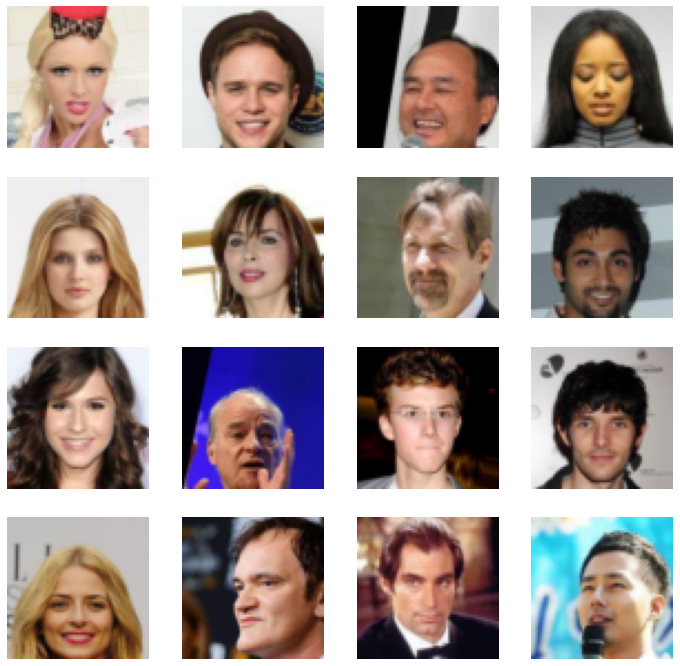

In [28]:
dls.show_batch(max_n=16)

In [29]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic = basic_critic(64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [31]:
learn = GANLearner.wgan(dls, generator, critic, opt_func=RMSProp)

In [33]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [34]:
learn.fit(10, 2e-4, wd=0.)

/home/tupleteam/.local/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/tupleteam/.local/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/tupleteam/.local/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
0,-0.748326,0.622416,-1.131178,00:35
1,-0.642510,0.538616,-0.956589,00:36
2,-0.566755,0.440149,-0.819808,00:35
3,-0.509349,0.383958,-0.732783,00:36
4,-0.443432,0.312371,-0.639169,00:36
5,-0.411314,0.264205,-0.571405,00:36
6,-0.389203,0.239602,-0.525704,00:36
7,-0.353336,0.197146,-0.491471,00:36
8,-0.339169,0.200253,-0.462734,00:36
9,-0.335008,0.186394,-0.434371,00:36


/home/tupleteam/.local/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


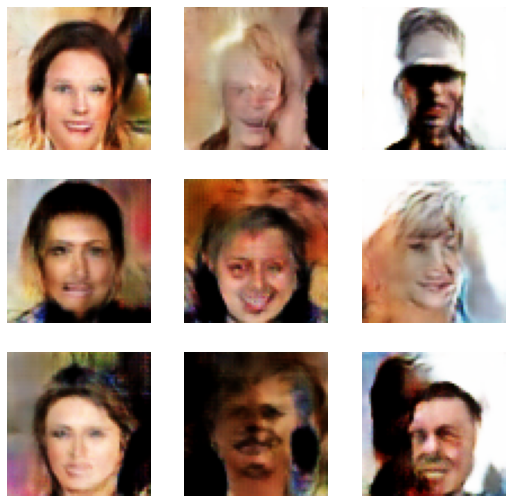

In [35]:
learn.show_results(max_n=9, ds_idx=0)